In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\MachineLearning\market_data.csv")

In [3]:
df.head()

,Sale,InStrSpending,Discount,TVSpending,StockRate,Price,Radio,OnlineAdsSpending
0,240368,59.90,0.46,46.30,0.45,12.56,1065,1081.60
1,207276,7.28,0.39,166.91,0.05,5.44,1832,651.24
2,172572,9.81,0.41,73.67,0.06,3.54,587,1066.56
3,82697,46.94,0.27,33.95,0.88,28.90,1407,1855.27
4,141762,2.59,0.26,82.63,0.36,4.66,2057,1608.91


In [4]:
df.dtypes

Sale                   int64
InStrSpending        float64
Discount             float64
TVSpending           float64
StockRate            float64
Price                float64
Radio                  int64
OnlineAdsSpending    float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sale               992 non-null    int64  
 1   InStrSpending      992 non-null    float64
 2   Discount           992 non-null    float64
 3   TVSpending         992 non-null    float64
 4   StockRate          992 non-null    float64
 5   Price              992 non-null    float64
 6   Radio              992 non-null    int64  
 7   OnlineAdsSpending  992 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 62.1 KB


In [6]:
df

,Sale,InStrSpending,Discount,TVSpending,StockRate,Price,Radio,OnlineAdsSpending
0,240368,59.90,0.46,46.30,0.45,12.56,1065,1081.60
1,207276,7.28,0.39,166.91,0.05,5.44,1832,651.24
2,172572,9.81,0.41,73.67,0.06,3.54,587,1066.56
3,82697,46.94,0.27,33.95,0.88,28.90,1407,1855.27
4,141762,2.59,0.26,82.63,0.36,4.66,2057,1608.91
...,...,...,...,...,...,...,...,...
987,26191,19.69,0.18,32.60,0.81,26.22,1840,2238.49
988,132714,19.48,0.23,116.64,0.21,17.53,2156,1564.64
989,32894,22.79,0.49,39.33,0.26,29.23,503,1020.22
990,39091,13.84,0.14,37.71,0.33,23.13,2902,1201.03


C:\Users\SANTOSH\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


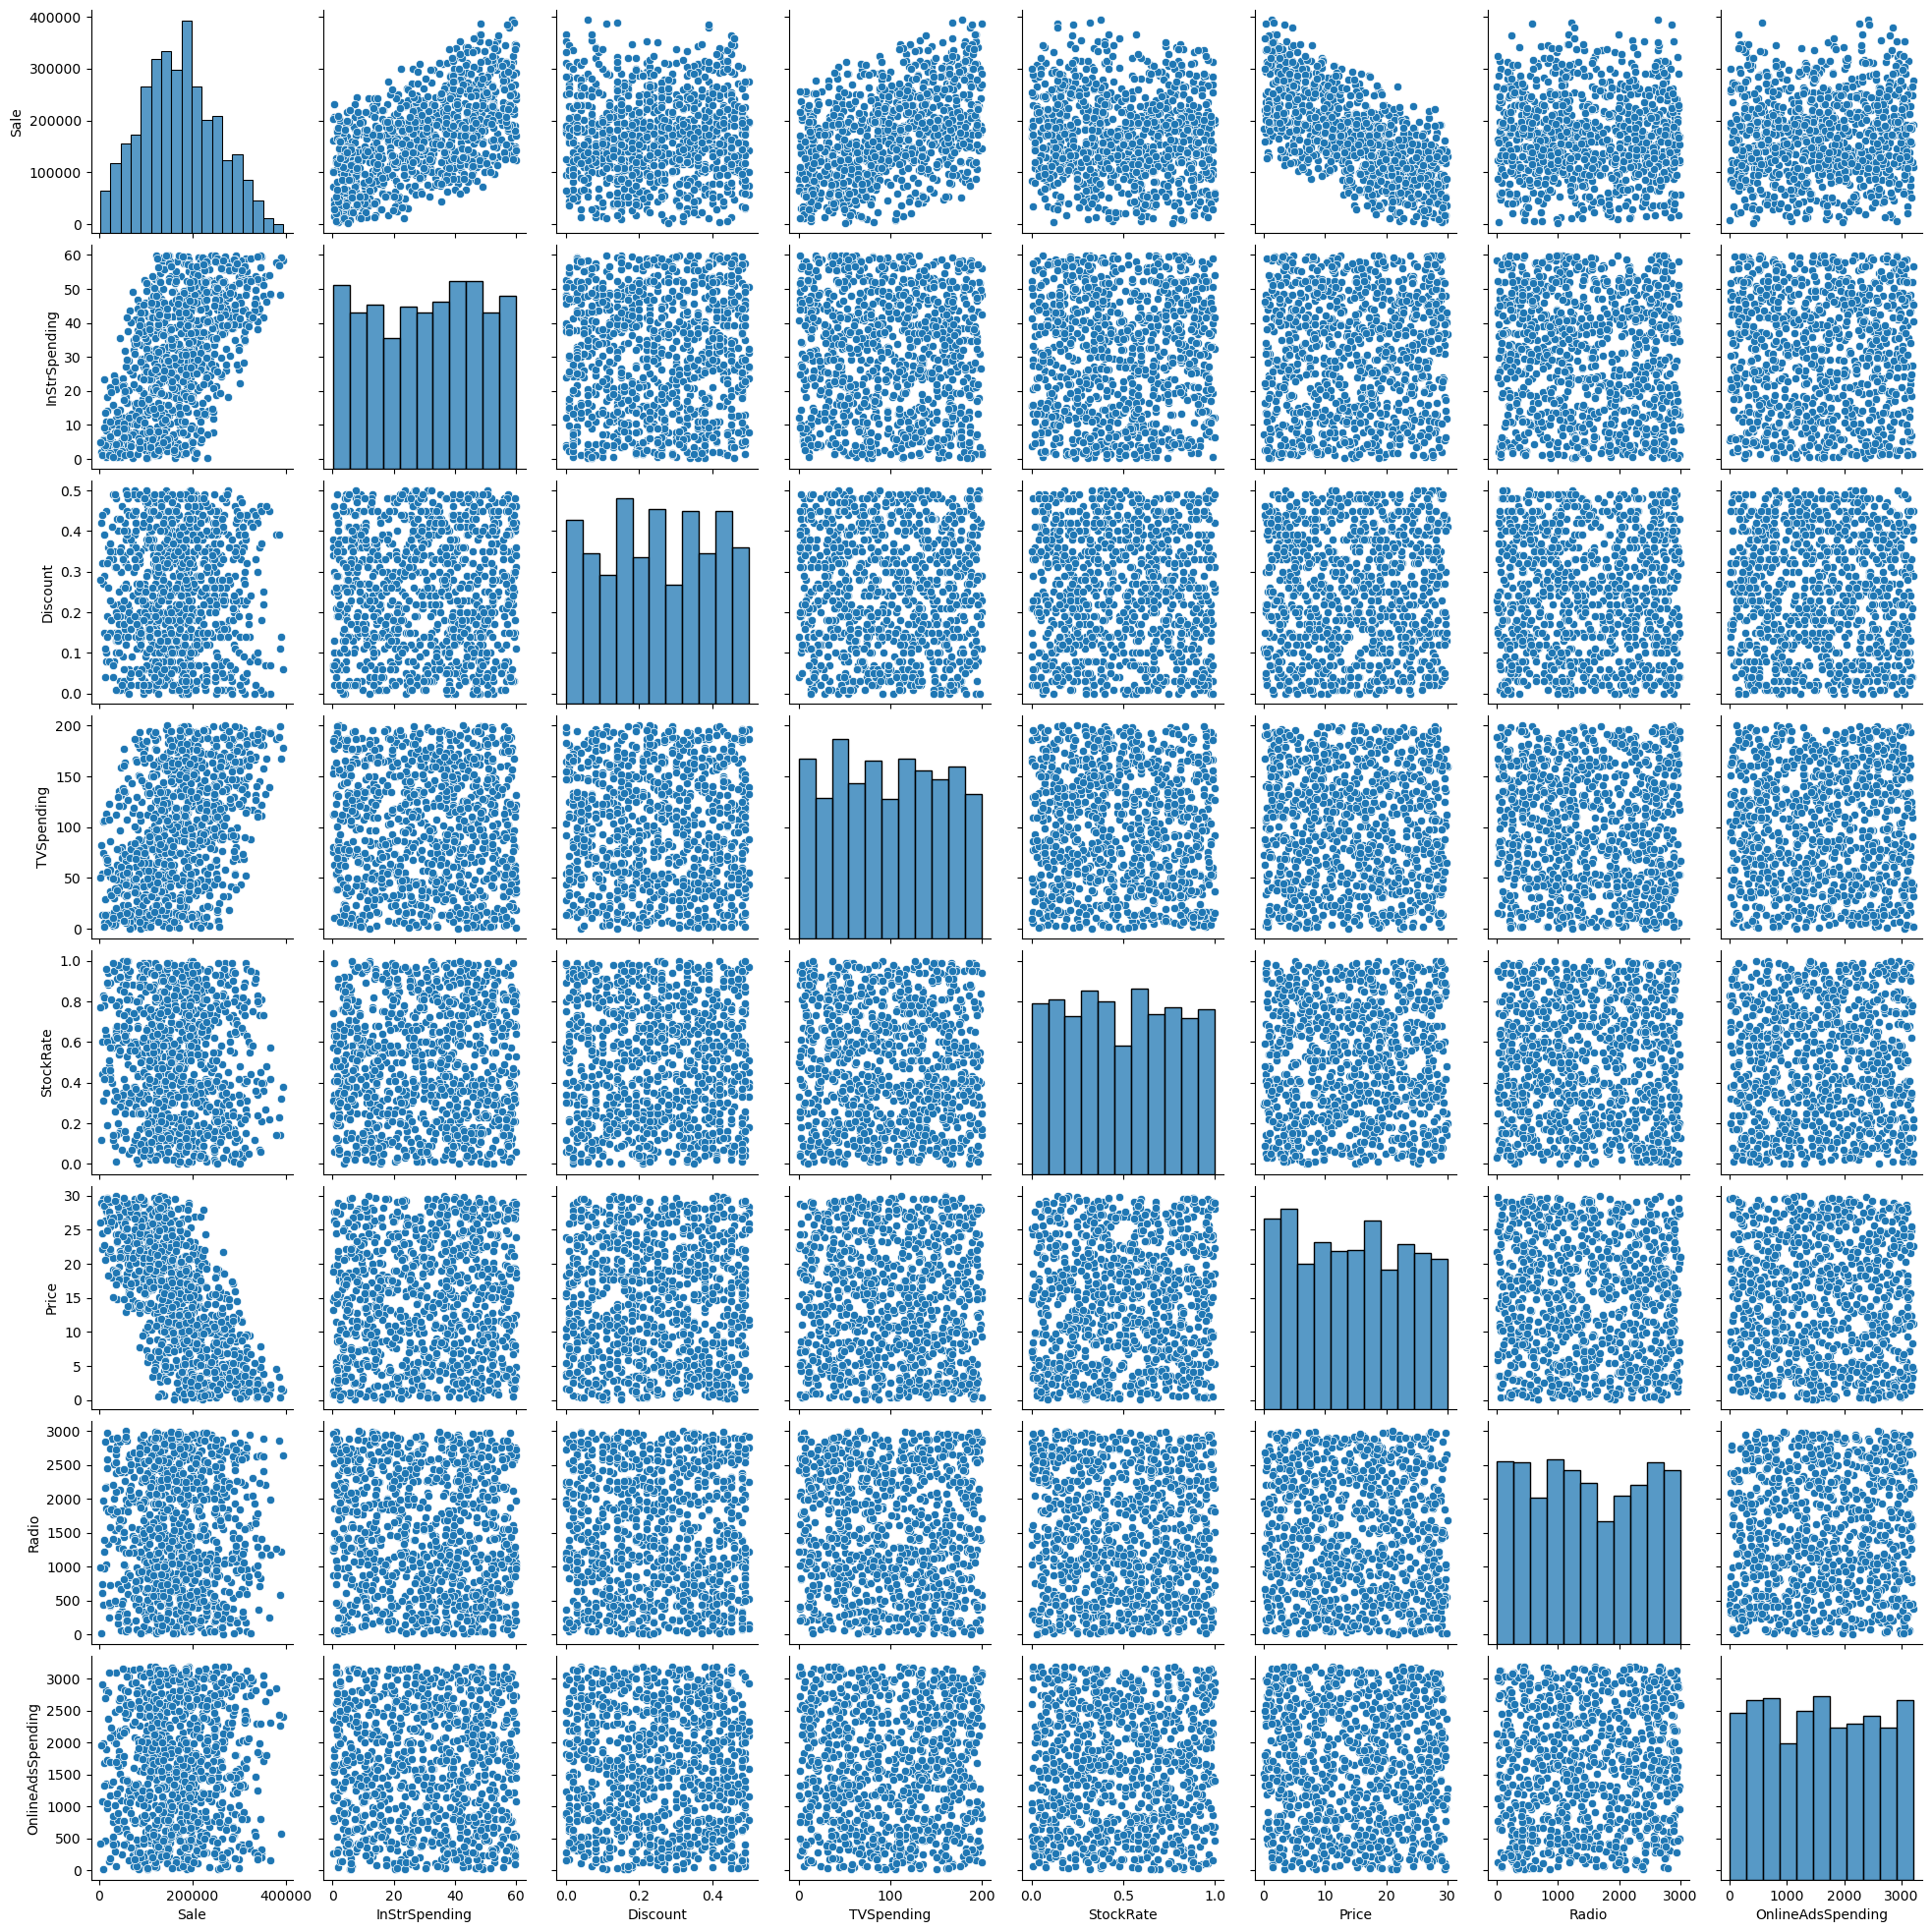

In [7]:
sns.pairplot(data=df)

<Axes: xlabel='Price', ylabel='Sale'>

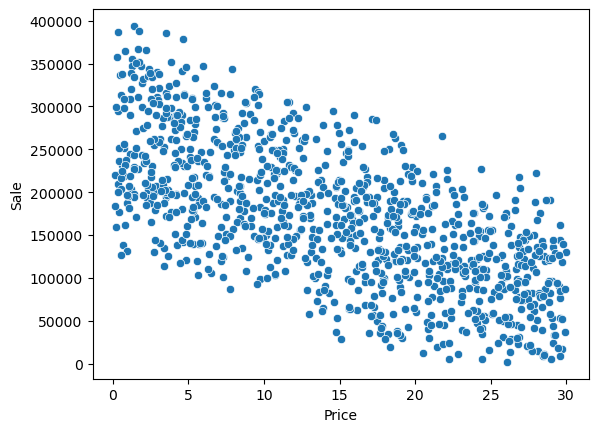

In [8]:
sns.scatterplot(data=df,x=df['Price'],y=df['Sale'])

<Axes: xlabel='Sale', ylabel='Density'>

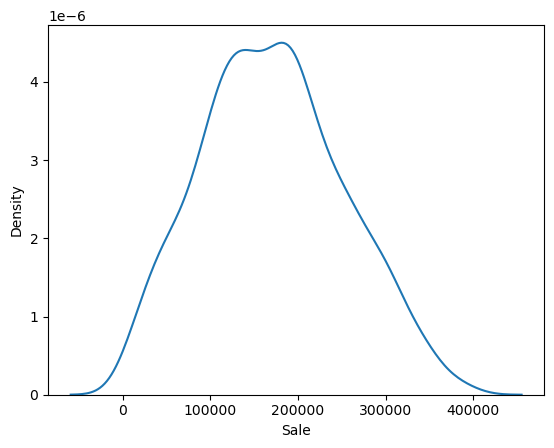

In [9]:
sns.kdeplot(x=df['Sale'])

<Axes: >

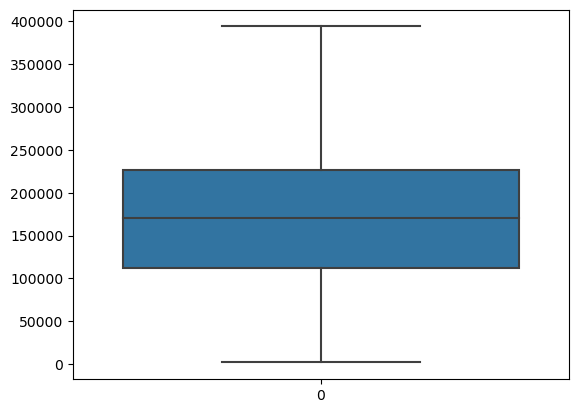

In [10]:
sns.boxplot(df['Sale'])

## Conclusion : From this we can say no outliers present 

In [11]:
mean = df['Sale'].mean()

In [12]:
std  = df['Sale'].std()

In [13]:
std

81397.84330060515

In [14]:
clipped_data = df['Sale'].clip(mean-3*std,mean+3*std)

<Axes: xlabel='Sale', ylabel='Density'>

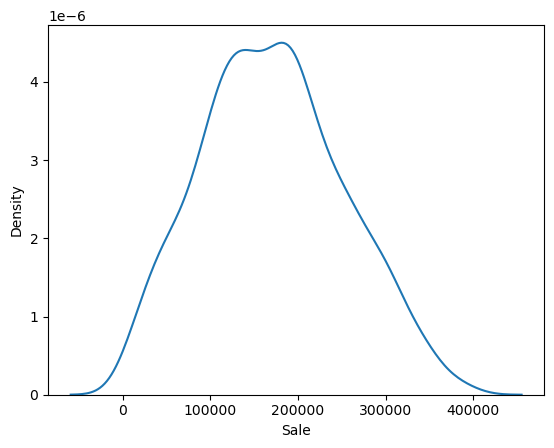

In [15]:
sns.kdeplot(clipped_data)

In [16]:
df[['Sale','Price']].corr()

,Sale,Price
Sale,1.000000,-0.673372
Price,-0.673372,1.000000


In [17]:
df.head()

,Sale,InStrSpending,Discount,TVSpending,StockRate,Price,Radio,OnlineAdsSpending
0,240368,59.90,0.46,46.30,0.45,12.56,1065,1081.60
1,207276,7.28,0.39,166.91,0.05,5.44,1832,651.24
2,172572,9.81,0.41,73.67,0.06,3.54,587,1066.56
3,82697,46.94,0.27,33.95,0.88,28.90,1407,1855.27
4,141762,2.59,0.26,82.63,0.36,4.66,2057,1608.91


C:\Users\SANTOSH\AppData\Local\Temp\ipykernel_24020\1381036381.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sale'])


<Axes: xlabel='Sale', ylabel='Density'>

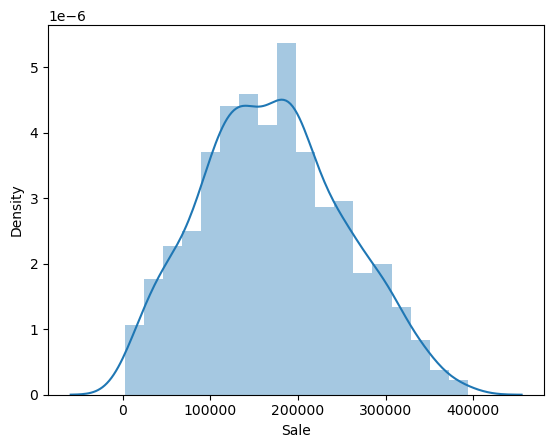

In [18]:
sns.distplot(df['Sale'])

## From the above graph it is shown that 
1. Most probable sale is 2000000


In [19]:
Theortical_data = np.random.normal(mean,std,size=df['Sale'].size) # here we created a theortical data 

In [20]:
Theortical_data.sort() # numpy sort 

In [21]:
Sales = df['Sale'].sort_values().values # pandas sort 

In [22]:
X_quantile = [] 
Y_quantile = []
for i in range(1,101):
    X_quantile.append(np.percentile(Sales,i))
    Y_quantile.append(np.percentile(Theortical_data,i))
    
    

In [23]:
X_quantile

[13158.960000000001,
 21595.02,
 29240.31,
 35710.44,
 40660.4,
 44922.56,
 50529.28,
 54395.36,
 58524.85,
 63032.0,
 67302.02,
 74113.40000000001,
 78091.15000000001,
 82356.66,
 85364.0,
 87501.48,
 91260.74,
 95374.14,
 96901.78,
 99877.2,
 102227.01,
 104676.68000000001,
 107755.05,
 110239.20000000001,
 112479.25,
 115477.88,
 118147.17,
 119757.4,
 121158.56999999999,
 123173.5,
 125252.76,
 126700.16,
 129636.21,
 132521.88,
 133749.55,
 136463.88,
 138217.08,
 140030.72,
 143024.49,
 145214.0,
 147106.87,
 148899.42,
 151105.06,
 153913.56,
 156304.25,
 158895.62,
 161136.34,
 163462.64,
 167135.59,
 170390.5,
 171794.23,
 173925.36000000002,
 175948.48,
 178290.04,
 180040.15000000002,
 182497.04,
 185130.85,
 186395.96,
 187767.56,
 189743.0,
 191418.79,
 194505.06,
 195374.83000000002,
 197039.0,
 199019.19999999998,
 201879.56,
 204359.47,
 206953.96,
 208404.9,
 212601.09999999998,
 215084.7,
 217582.0,
 220392.88999999998,
 223356.56000000003,
 226027.25,
 229254.56,
 23

<Axes: >

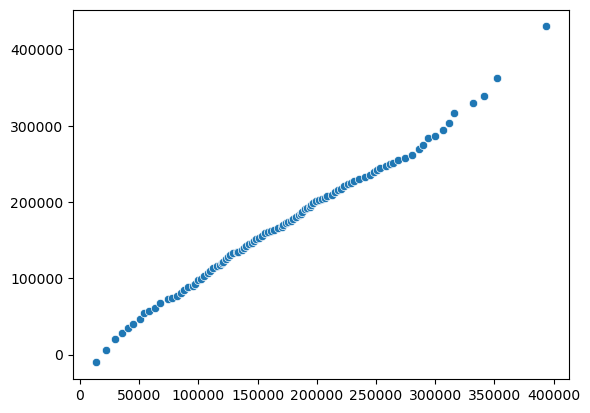

In [24]:
sns.scatterplot(x=X_quantile,y=Y_quantile)

## From above we can conclude that Sales is in Normal Distribution

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression()

In [27]:
X = df['Price'].values
Y = df['Sale'].values

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.8)

In [29]:
x = x_train.reshape(-1,1)
y = y_train.reshape(-1,1)

In [30]:
model.fit(x,y)

LinearRegression()

In [31]:
model.coef_

array([[-6373.11181182]])

In [32]:
model.intercept_

array([264690.94125752])

In [36]:
Y_predict = model.predict(x_test.reshape(-1,1)) #predicted values this is used for test with y_test

In [54]:
from sklearn.metrics import r2_score
r2_score(y_test,Y_predict)

0.3946208031671655

##  Here we can say sale is 39% dependent on price

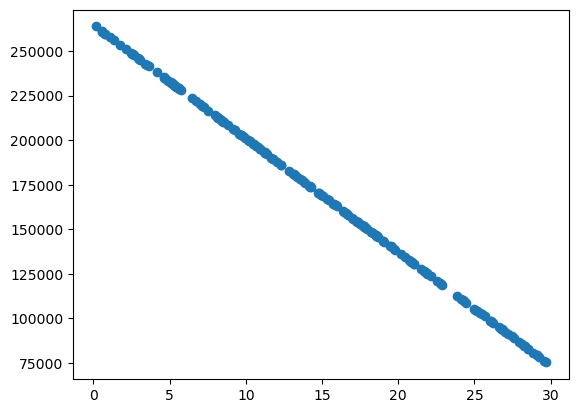

In [35]:
plt.scatter(x_test,X_predict)


In [44]:
df.head()

,Sale,InStrSpending,Discount,TVSpending,StockRate,Price,Radio,OnlineAdsSpending
0,240368,59.90,0.46,46.30,0.45,12.56,1065,1081.60
1,207276,7.28,0.39,166.91,0.05,5.44,1832,651.24
2,172572,9.81,0.41,73.67,0.06,3.54,587,1066.56
3,82697,46.94,0.27,33.95,0.88,28.90,1407,1855.27
4,141762,2.59,0.26,82.63,0.36,4.66,2057,1608.91


## Here Sale is depending upon on all features so we need to use mutiliple linear regression 


In [47]:
Mul_inde=df.drop('Sale',axis=1).values
Mul_de=df['Sale'].values
#mid-multi independent feature
#md-multi dependent feature

In [48]:
mid_train,mid_test,md_train,md_test = train_test_split(Mul_inde,Mul_de,train_size=0.8)

In [49]:
model.fit(mid_train,md_train)

LinearRegression()

In [50]:
md_pred=model.predict(mid_test)

In [51]:
r2_score(md_test,md_pred)

0.9984263095086723